# Time Series Forecasting Using ARIMA/SARIMA in Python

Source: 

Ramesh Kumaran N, Time Series Forecasting Using ARIMA/SARIMA in Python, https://www.linkedin.com/pulse/time-series-forecasting-using-arimasarima-python-ramesh-kumaran-n-xpvoc/

**Components of ARIMA:**

- AR (Autoregression): A model that uses the dependent relationship between an observation and some number of lagged observations.

- I (Integrated): Involves differencing the raw observations to make the time series stationary.

- MA (Moving Average): A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

**SARIMA Model:**

- SARIMA, or Seasonal ARIMA, extends ARIMA by explicitly supporting univariate time series data with a seasonal component. 

- It adds three new hyperparameters to specify the autoregression (AR), differencing (I), and moving average (MA) for the seasonal component.


## Step 1: Importing Required Libraries and Loading Data

In [1]:
#!pip install statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your time series data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


## Step 2: Visualizing the Data

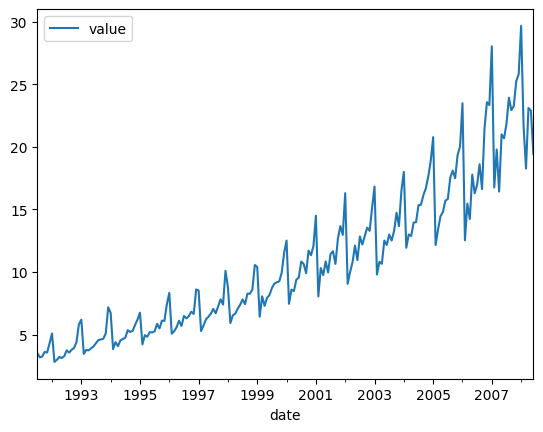

In [3]:
df.plot()
plt.show()

## Step 3: Checking Stationarity

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 3.145185689306734
p-value: 1.0


## Step 4: Fitting the ARIMA Model

In [5]:
model = ARIMA(df, order=(1,1,1))  # adjust parameters as necessary
fitted_model = model.fit()
print(fitted_model.summary())

/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.762
Date:                Sun, 19 Jan 2025   AIC                            855.524
Time:                        18:37:50   BIC                            865.463
Sample:                    07-01-1991   HQIC                           859.545
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3009      0.094      3.195      0.001       0.116       0.485
ma.L1         -0.8300      0.048    -17.204      0.000      -0.925      -0.735
sigma2         3.8327      0.259     14.790      0.0

## Step 5: Making Predictions

In [6]:
# Forecast future values
fc = fitted_model.get_forecast(steps=12)
forecast = fc.summary_frame()
print(forecast)

value            mean   mean_se  mean_ci_lower  mean_ci_upper
2008-07-01  21.203379  1.957734      17.366291      25.040467
2008-08-01  21.736449  2.163945      17.495196      25.977703
2008-09-01  21.896846  2.248347      17.490167      26.303524
2008-10-01  21.945108  2.306904      17.423659      26.466557
2008-11-01  21.959629  2.358008      17.338019      26.581240
2008-12-01  21.963999  2.406320      17.247698      26.680299
2009-01-01  21.965313  2.453183      17.157163      26.773463
2009-02-01  21.965709  2.499020      17.067719      26.863699
2009-03-01  21.965828  2.543989      16.979701      26.951955
2009-04-01  21.965864  2.588164      16.893156      27.038571
2009-05-01  21.965875  2.631593      16.808047      27.123702
2009-06-01  21.965878  2.674316      16.724315      27.207441


In [7]:
# Extending to SARIMA for Seasonal Data
seasonal_model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,1,12))  # adjust parameters and the seasonal period
fitted_seasonal_model = seasonal_model.fit()
print(fitted_seasonal_model.summary())

/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31169D+00    |proj g|=  1.41443D-01


 This problem is unconstrained.



At iterate    5    f=  1.26796D+00    |proj g|=  1.71568D-02

At iterate   10    f=  1.26745D+00    |proj g|=  3.80822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   4.176D-06   1.267D+00
  F =   1.2674486784192327     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -258.560
Date:                     

In [8]:
# Making Seasonal Predictions
# Forecast future values
fc_seasonal = fitted_seasonal_model.get_forecast(steps=12)
forecast_seasonal = fc_seasonal.summary_frame()
print(forecast_seasonal)

value            mean   mean_se  mean_ci_lower  mean_ci_upper
2008-07-01  23.790592  0.926411      21.974860      25.606324
2008-08-01  24.596186  0.928587      22.776188      26.416184
2008-09-01  23.855360  0.973745      21.946854      25.763866
2008-10-01  25.440113  1.001008      23.478174      27.402051
2008-11-01  27.345755  1.031337      25.324372      29.367138
2008-12-01  27.747724  1.059796      25.670562      29.824886
2009-01-01  31.661029  1.087769      29.529040      33.793017
2009-02-01  22.296795  1.114974      20.111487      24.482103
2009-03-01  22.039276  1.141547      19.801885      24.276668
2009-04-01  23.251084  1.167512      20.962803      25.539365
2009-05-01  25.068026  1.192912      22.729961      27.406092
2009-06-01  23.127570  1.217783      20.740759      25.514381
